In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import os

# Load the dataset
file_path = '/content/Project Dataset - Avinash project3.xlsx'
excel_data = pd.ExcelFile(file_path)

# Load the relevant sheet for Project 3 data
project3_data = excel_data.parse('Project 3')

# Convert 'Month' column to a datetime format for proper time series indexing
project3_data['Month'] = pd.to_datetime(project3_data['Month'], format='%b')

# Group data by month and sum up sales volumes for demand forecasting
monthly_sales = project3_data.groupby(project3_data['Month'].dt.to_period('M')).agg({'Sales_Volume': 'sum'})
monthly_sales.index = monthly_sales.index.to_timestamp()

# Build the ARIMA Model
model = ARIMA(monthly_sales['Sales_Volume'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast for the next 12 months
forecast = model_fit.forecast(steps=12)
forecast_index = pd.date_range(start=monthly_sales.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecasted_Sales_Volume'])

# Combine historical and forecasted data into a single DataFrame
combined_df = monthly_sales.rename(columns={'Sales_Volume': 'Historical_Sales_Volume'}).copy()

# Append forecast data to the combined DataFrame
for date, value in forecast_df['Forecasted_Sales_Volume'].items():
    combined_df.loc[date, 'Forecasted_Sales_Volume'] = value

# Save the combined data to a CSV file
csv_file_path = '/mnt/data/Inventory_Demand_Forecast.csv'
# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(csv_file_path), exist_ok=True)

combined_df.to_csv(csv_file_path)

print(f"The data has been saved at: {csv_file_path}")


The data has been saved at: /mnt/data/Inventory_Demand_Forecast.csv


<ipython-input-3-99b4fcb0bc82>:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=monthly_sales.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')


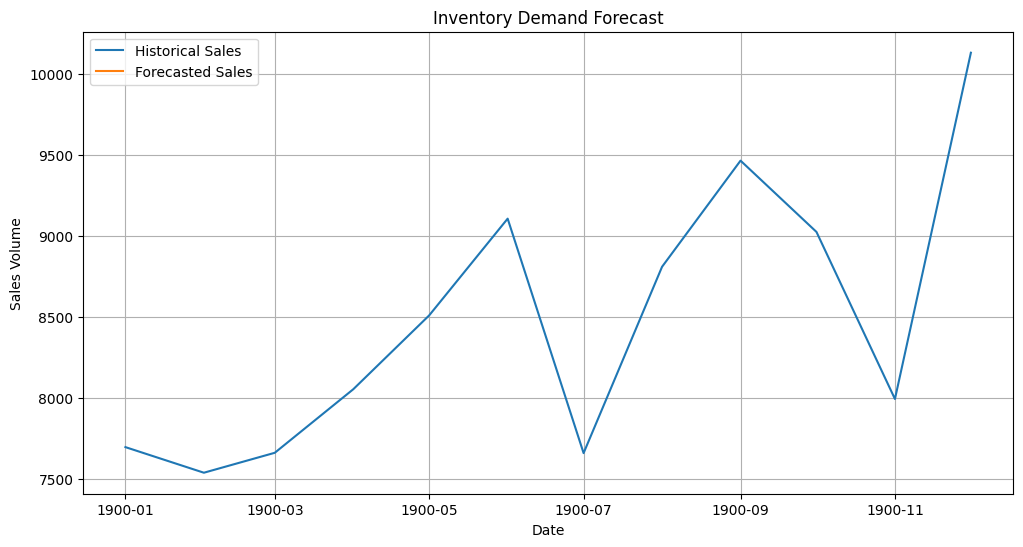

In [ ]:

import matplotlib.pyplot as plt

# Assuming combined_df is already created as in the previous code
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Historical_Sales_Volume'], label='Historical Sales')
plt.plot(combined_df['Forecasted_Sales_Volume'], label='Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.title('Inventory Demand Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Assuming 'combined_df' is the DataFrame with your historical and forecasted data

# Define the file path where you'd like to save the CSV file
csv_file_path = 'Inventory_Demand_Forecast.csv'

# Save to CSV
combined_df.to_csv(csv_file_path)

print(f"The forecasted data has been saved at: {csv_file_path}")


The forecasted data has been saved at: Inventory_Demand_Forecast.csv
